sex
f    11.110483
m     8.133458
Name: metric_value, dtype: float64


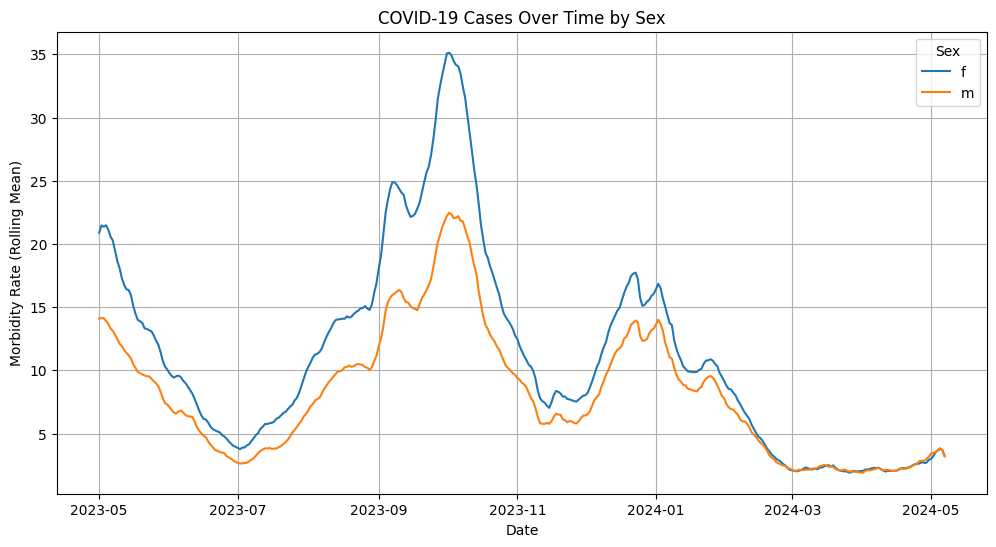

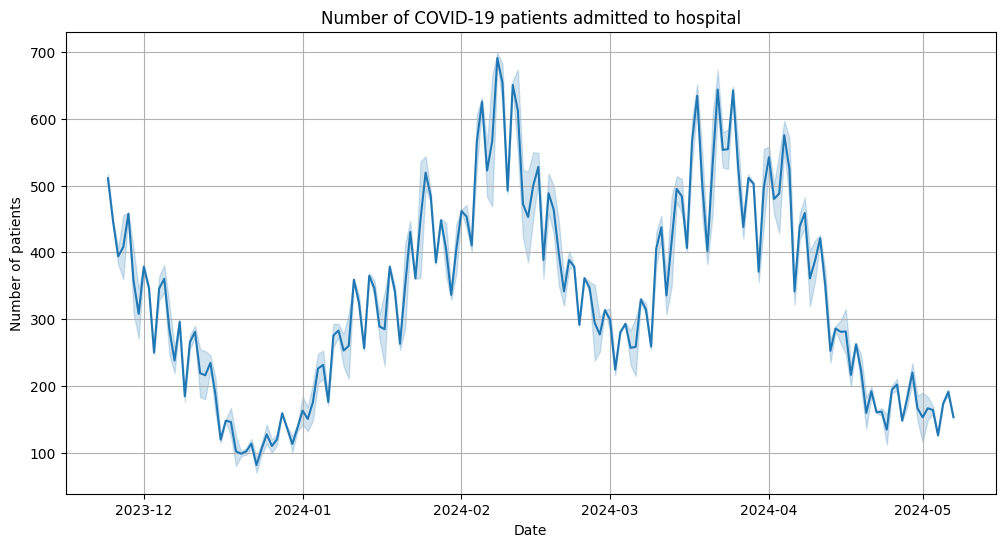

In [39]:
# Import the library file and name it
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from scipy.stats import spearmanr

# Read data
data = pd.read_csv('/content/ukhsa-chart-download.csv')
data2 = pd.read_csv('/content/ukhsa-chart-download2.csv')

# Convert the date in a file to the date format in Pandas
data['date'] = pd.to_datetime(data['date'])
data2['date'] = pd.to_datetime(data['date'])

# The gender groups were categorized and the average case rate was calculated for each sex group.
print(data.groupby(['sex'])['metric_value'].mean())

# Create a 12 "by 6" window
plt.figure(figsize=(12, 6))

# Draw a line plot where the two axis data are date and metric_value, grouped by gender
sns.lineplot(x='date', y='metric_value', hue='sex', data=data)

# Set title, x axis, y axis name and legend name
plt.title('COVID-19 Cases Over Time by Sex')
plt.xlabel('Date')
plt.ylabel('Morbidity Rate (Rolling Mean)')
plt.legend(title='Sex')

# Show the grid and display
plt.grid(True)
plt.show()

# Plot the second data using the same method
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='metric_value', data=data2)
plt.title('Number of COVID-19 patients admitted to hospital')
plt.xlabel('Date')
plt.ylabel('Number of patients')
plt.grid(True)
plt.show()



Mean Squared Error: 45.45691493423884


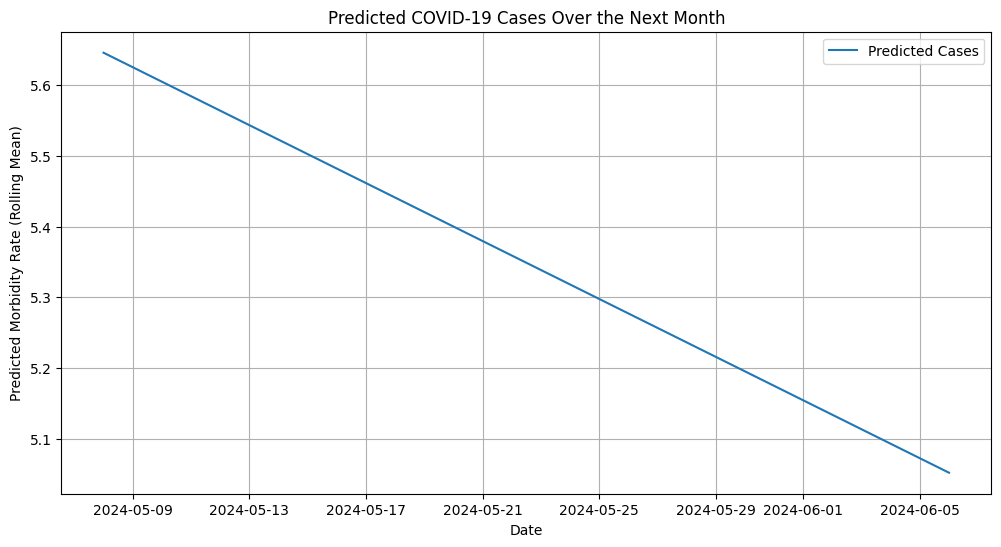

In [40]:

# Prepare data for modelling
data['date_ordinal'] = data['date'].map(pd.Timestamp.toordinal)
X = data[['date_ordinal']]
y = data['metric_value']

# The variable X and the variable y are divided into the training set and the test set according to the specified ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate the mean square error between the predicted and actual values
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Generate date data for the next 30 days starting May 8
future_dates = pd.date_range('2024-05-08', periods=30)
future_dates_df = pd.DataFrame({'date_ordinal': future_dates.map(pd.Timestamp.toordinal)})

# Predict future cases
future_cases = model.predict(future_dates_df)

# Create a 12 "by 6" window
plt.figure(figsize=(12, 6))

# Draw a line chart, use the date data at future time points as the X-axis, the Predicted number of Cases as the Y-axis, and the legend as the Predicted Cases
plt.plot(future_dates, future_cases, label='Predicted Cases')

# Set title, x axis, y axis name and legend
plt.title('Predicted COVID-19 Cases Over the Next Month')
plt.xlabel('Date')
plt.ylabel('Predicted Morbidity Rate (Rolling Mean)')
plt.legend()

# Show the grid and display
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


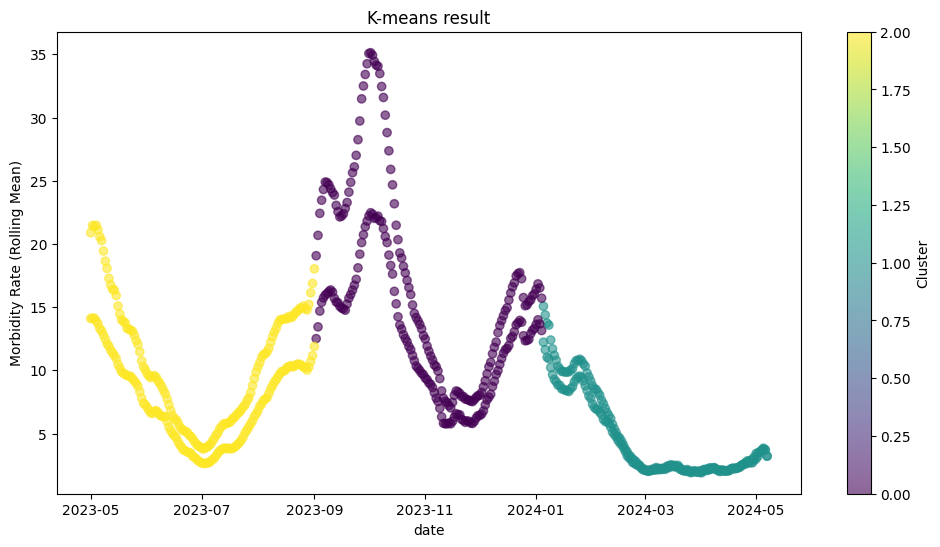

In [41]:

# Prepare data
data['date_ordinal'] = data['date'].map(pd.Timestamp.toordinal)
X = data[['date_ordinal', 'metric_value']]

# Divide the data into 3 clusters and run the K-means algorithm
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Visualize predictions
plt.figure(figsize=(12, 6))

# Create the scatter plot, select date and metric_value as data, use the viridis color map and set the transparency to 0.6
plt.scatter(data['date'], data['metric_value'], c=clusters, cmap='viridis', alpha=0.6)

# Set title, x axis and y axis name
plt.title('K-means result')
plt.xlabel('date')
plt.ylabel('Morbidity Rate (Rolling Mean)')

# Displays the range of values represented by different colors in the scatter plot and provides label descriptions
plt.colorbar(label='Cluster')
plt.show()


In [42]:
#  Due to the varying lengths of the arrays, only arrays of equal length are selected for correlation analysis.
min_length = min(len(data), len(data2))
data_m = data.iloc[:min_length]
data2_m = data2.iloc[:min_length]

# Compute Spearman's rank correlation between date ordinals and morbidity
spearman_corr, spearman_pvalue = spearmanr(data_m['date_ordinal'], data2_m['metric_value'])

# Display data
print(spearman_corr, spearman_pvalue)


0.11823110153835928 0.0312631244029588


**Overview**

  COVID-19, full name "Coronavirus Disease 2019," is an infectious disease caused by Severe acute respiratory syndrome Coronavirus type 2 (SARS-CoV-2). The main symptoms of COVID-19 include fever, dry cough, fatigue, difficulty breathing, muscle pain and sore throat. In severe cases, serious complications such as pneumonia, acute respiratory distress syndrome (ARDS), and multiple organ failure may occur, and may even be life-threatening.

  This code determines the correlation between the incidence per 100,000 people and daily hospital admissions during the COVID-19 pandemic 2023-2024 pandemic, and to predict incidence trends for the next 30 days after May 8.

  This code helps provide deeper data analysis and insights to help the public better understand and respond to COVID-19,  thereby increasing awareness and response capacity for outbreaks and laying the groundwork for future outbreaks.

**Requirements gathering process**

  The necessary data for the code includes COVID-19 case data from May 2023 to May 2024 and  the number of daily admissions for COVID-19 between 2023 and 2024.  The current data is sourced from the official website of the British government.  The code can serve as potential support for decision-making by relevant authorities regarding possible large-scale outbreaks in the future, as well as for developing more effective prevention and control strategies and resource allocation plans.  Additionally, the visual model aids in communicating epidemic data and trends to the public, thereby increasing public awareness and vigilance towards the epidemic.

**Technology**

  The K-mean algorithm is utilized as the primary technique for conducting cluster analysis on dates and morbidity rates in order to uncover underlying patterns and groupings within the data. Additionally, the linear regression algorithm is employed to generate ordinal date data for the next 30 days, enabling the prediction of epidemic indicator values for future dates.

**Problems encountered and implementation details**

  In the process of code writing, the main problems focus on the implementation of the algorithm, such as how to use the K-mean algorithm for analysis. When Spearman's rank correlation is used for correlation analysis, two arrays with different lengths cannot be processed further.

**Data source**

  "Rates per 100,000 people of the total number of COVID-19 cases since the start of the COVID-19 pandemic, by sex."

  "Daily number of COVID-19 patients admitted to hospital."

  (provided by the UKHSA data dashboard of UK Government,https://ukhsa-dashboard.data.gov.uk/topics/covid-19)

